<a href="https://colab.research.google.com/github/JHamza11/Breast-Cancer-Detection/blob/main/BreastCancerDetectionModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Breast cancer is the most commonly diagnosed cancer and second leading cancer death among women in the U.S. with 1 in 8 expected to develop it in her lifetime. Its overall death rate has steadily decreased by 1% per year from 2013 to 2018 which has thought to be from treatment advances and earlier detection.

Since earlier detection is thought to be a cause in decreasing breast cancer deaths, the predictive model built in this notebook serves as an attempt to fill this purpose as a classification problem. Preliminary analysis is done to
make conclusions based on the data and select the best features for predictive
accuracy.

**Load Libraries**


In [143]:
#Linear algebra
import numpy as np

# Data analysis and processing
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Preface of Data
Pulled from the [University of California at Irvine Machine Learning Repository’s Wisconsin Breast Cancer Database](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic), cells were measured through a digitized image of a fine needle aspirate (FNA), a biopsy procedure where a sample is collected through inserting a needle. Because all samples contained more than one cell, their physical characteristics were averaged with respect to the amount of cells in the sample.

Features (cell characteristics) for all cells in the FNA used in predictive analysis:
* `texture` is defined as the the standard deviation of gray-scale values.
* `radius` is defined as distance from center to points on the perimeter.
* `perimeter`
* `area`
* `smoothness` is defined as the mean of all local variation in radial length.
* `fractal_dimension` is defined as an index of how complicated cancer cell shapes are in the sample.

* Feature Measurements
  * `_mean` : average
  * `_se` : standard error
  * `_worst` : maximum value for a given feature in a sample

Diagnosis is a categorical variable defined in the data as:
  * B - Benign (non-cancerous)
  * M - Malignant (cancerous)
For classification purposes, the data will be transformed such that 0 represents benign and 1 represents malignant.

In [144]:
# Upload CSV file using Google Colab's file upload feature.

from google.colab import files
upload = files.upload()

Saving breast_cancer_data.csv to breast_cancer_data (3).csv


**Examine the Data**

In [145]:
df = pd.read_csv('breast_cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Filter out Unecessary Columns**

In [146]:
# Drop unecessary id column
df = df.drop('id', axis = 1)

In [147]:
# Show updated df
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [148]:
# Check for null values by counting number of empty cells in each column.
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Exploratory Data Analysis

The following section analyzes the structure of the dataset as well as relationships between all other variables and the target variable `diagnosis`

In [149]:
# Get descriptive statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [150]:
# Count amounts by diagnosis
print(df.diagnosis.value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


**Unimodal Data Analysis**

In [151]:
def show_bar_values(plt):
    for patch in plt.patches:
      _x = p.get_x() + p.get_width() / 2
      _y = p.get_y() + p.get_height()
      value = '{:f}'.format(p.get_height())
      ax.text(_x, _y, value, ha="center") 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


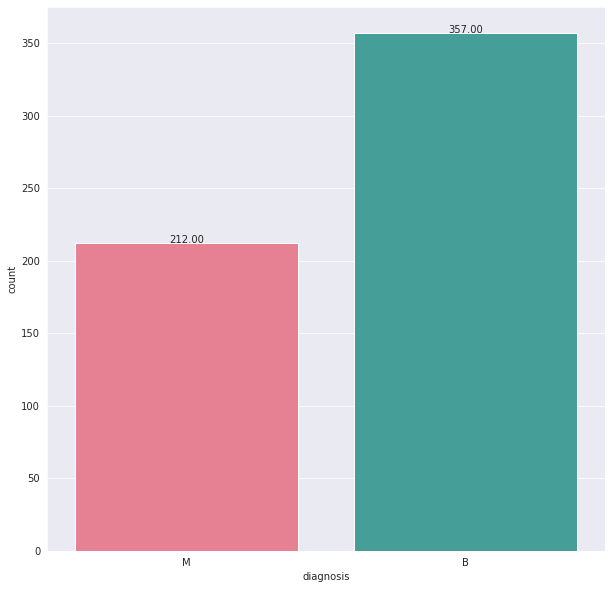

In [152]:
# Frequency count of diagnosis

sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (10, 10)})
freq_plt = sns.countplot(df['diagnosis'], label= 'Count', palette = "husl")
show_values_on_bars(freq_plt)

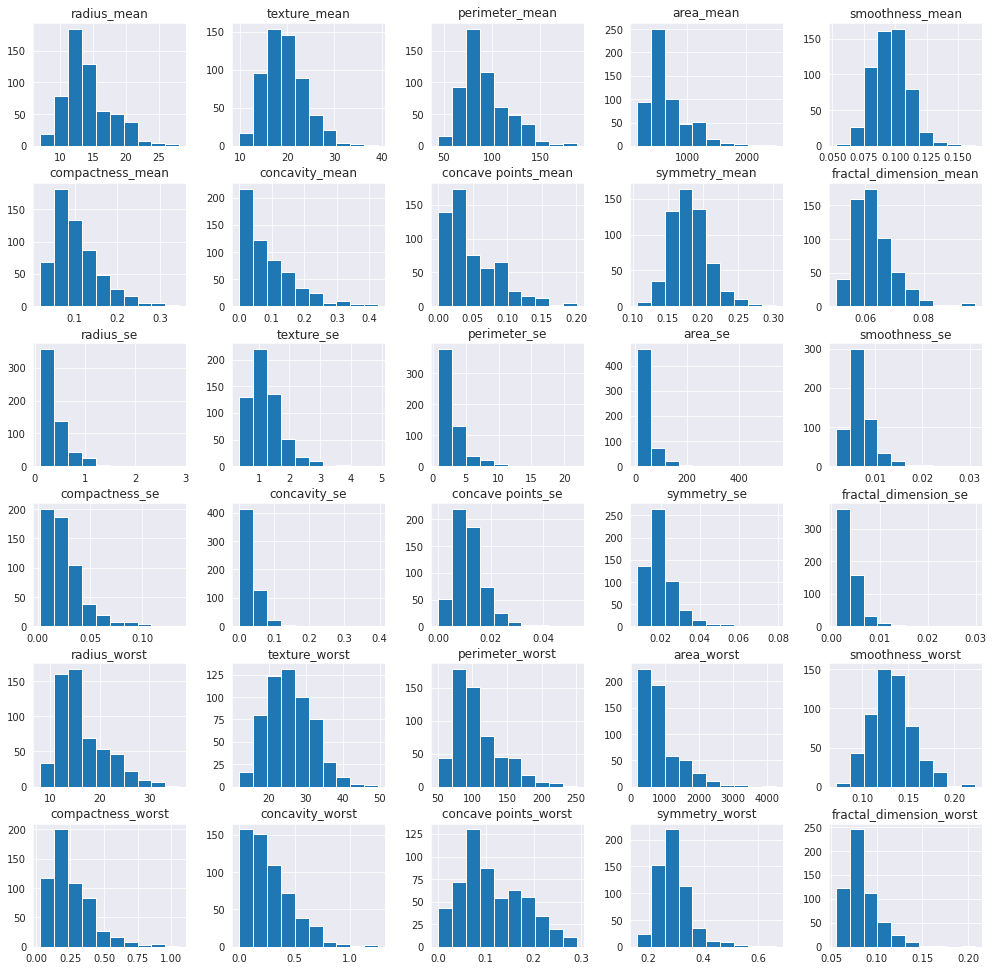

In [153]:
# Display distribution of each parameter
hist = df.hist(bins = 10, figsize = (17, 17), grid = True)

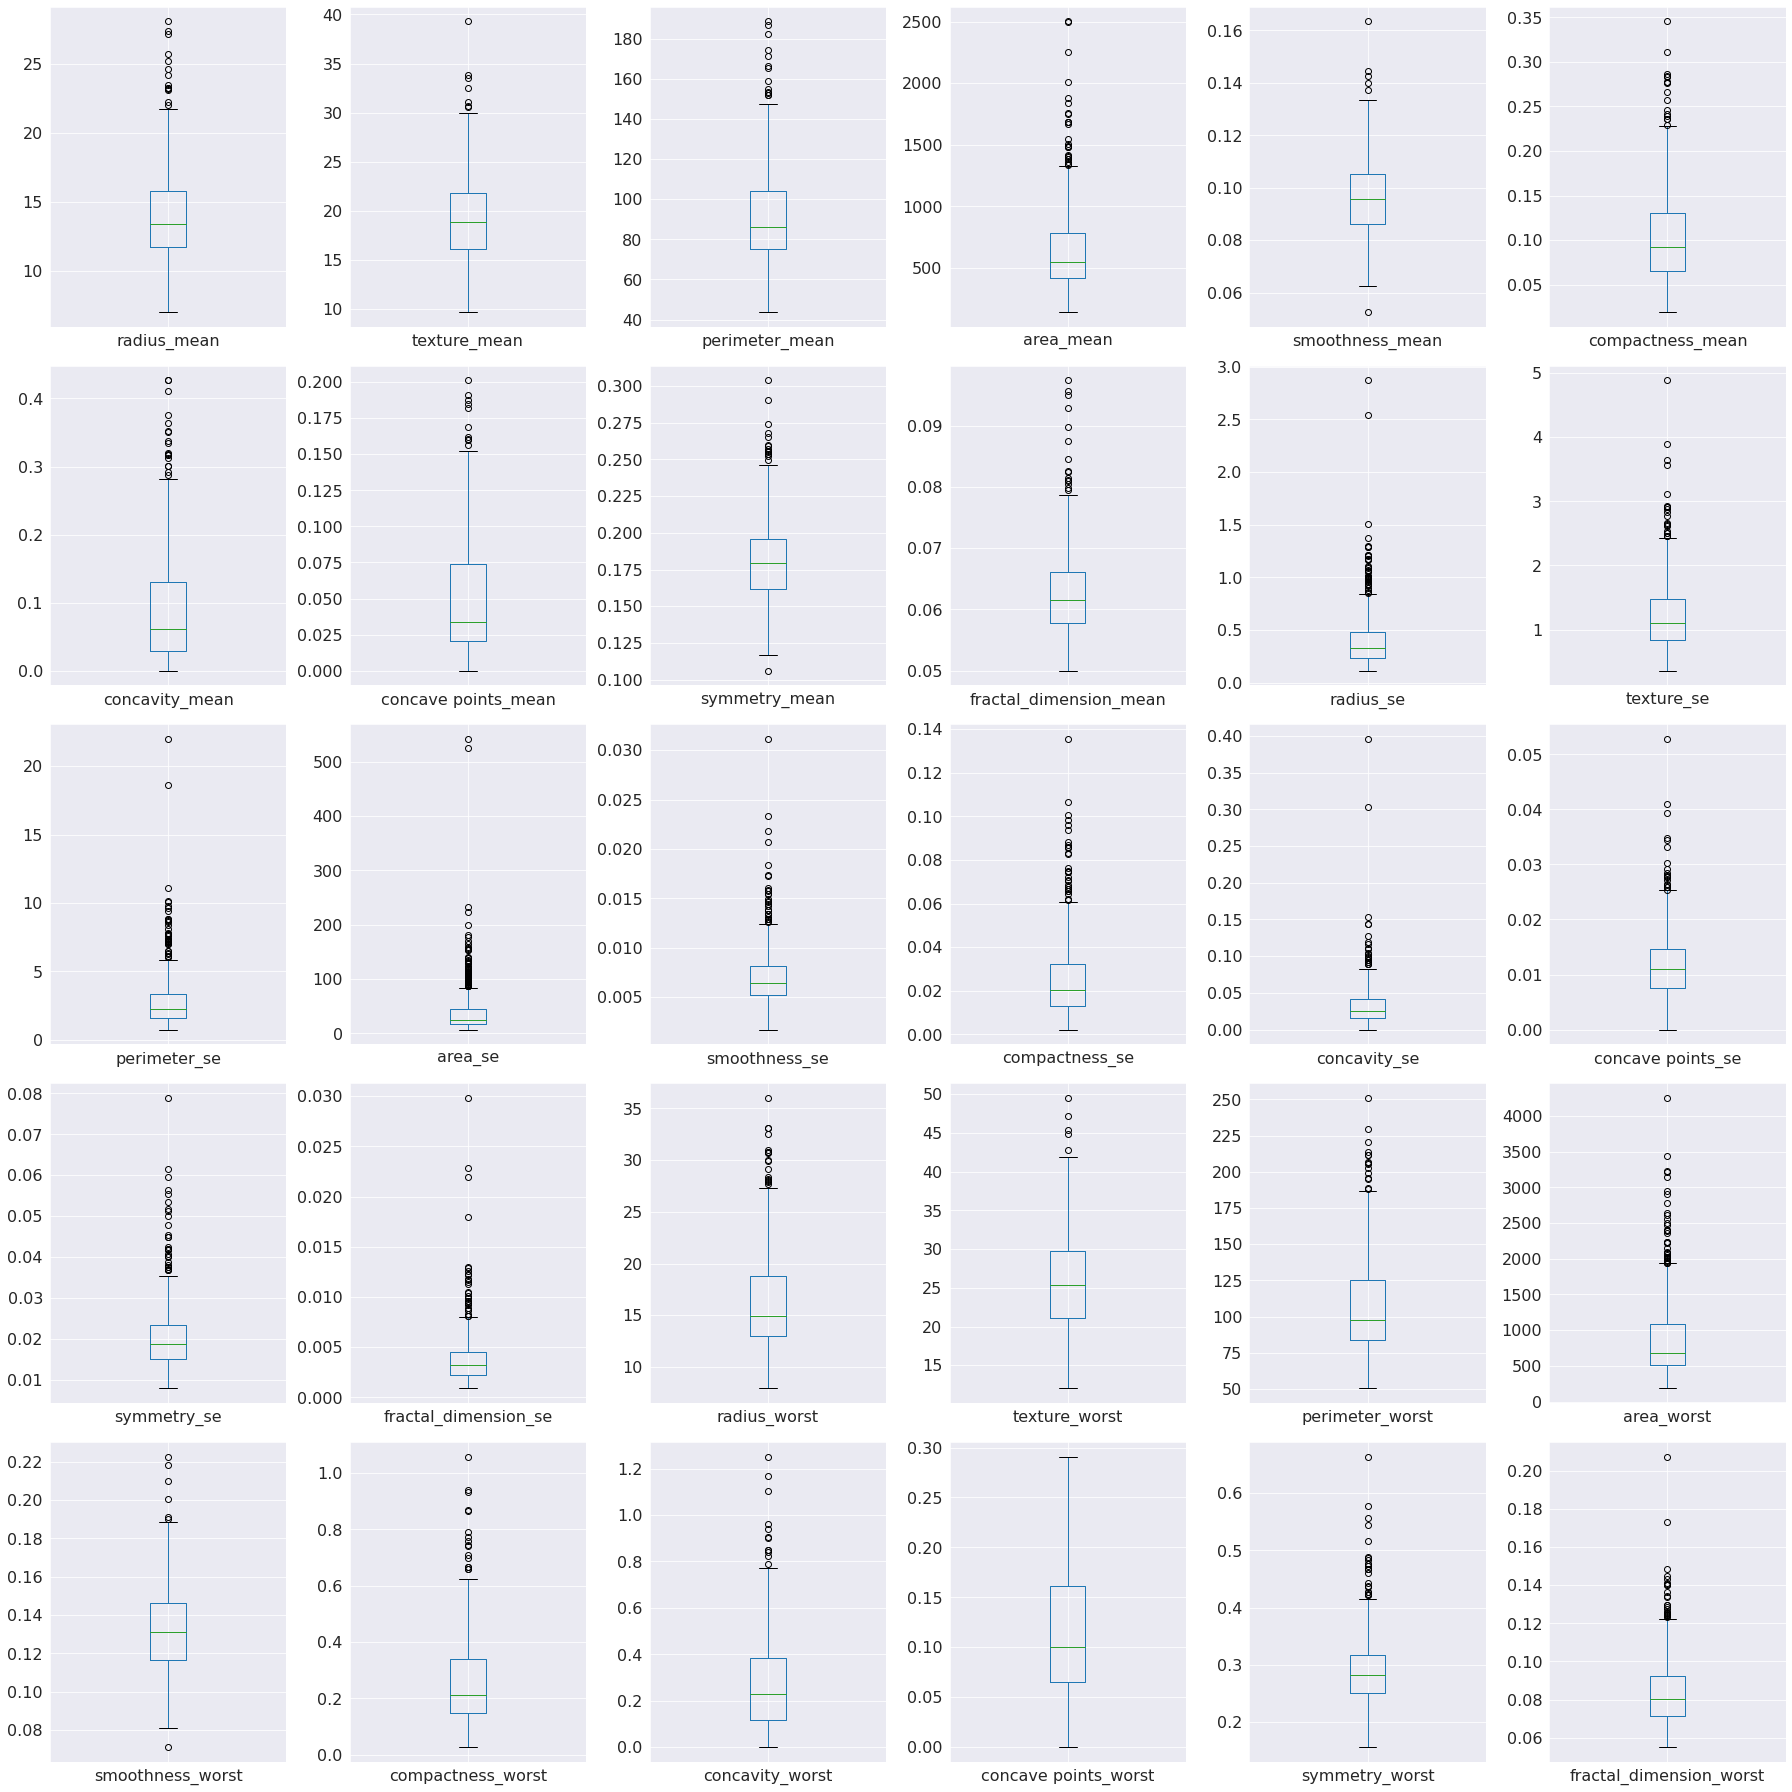

In [154]:
# Show box plots for data distribution of each parameter
box_plt = df.plot(kind = 'box', subplots = True, layout = (5, 6), sharex = 
                  False, sharey = False, fontsize = 16, figsize = (25, 25))
plt.tight_layout()

In [165]:
# Divide parameters into groups for easier kernal subplot readability
mean_df = df.loc[:, 'radius_mean' : 'fractal_dimension_mean']
se_df = df.loc[:, 'radius_se' : 'fractal_dimension_se']
worst_df = df.loc [:, 'radius_worst' : 'fractal_dimension_worst']

In [166]:
# General kernel density plot function
def kernel_plt(df):
  sns.set_style("darkgrid")
  kernel_plt = df.plot(kind = 'density', subplots=True, layout = (3, 4), 
                     sharex = False, sharey=False, fontsize = 12, figsize = 
                     (15, 15))
  return kernel_plt

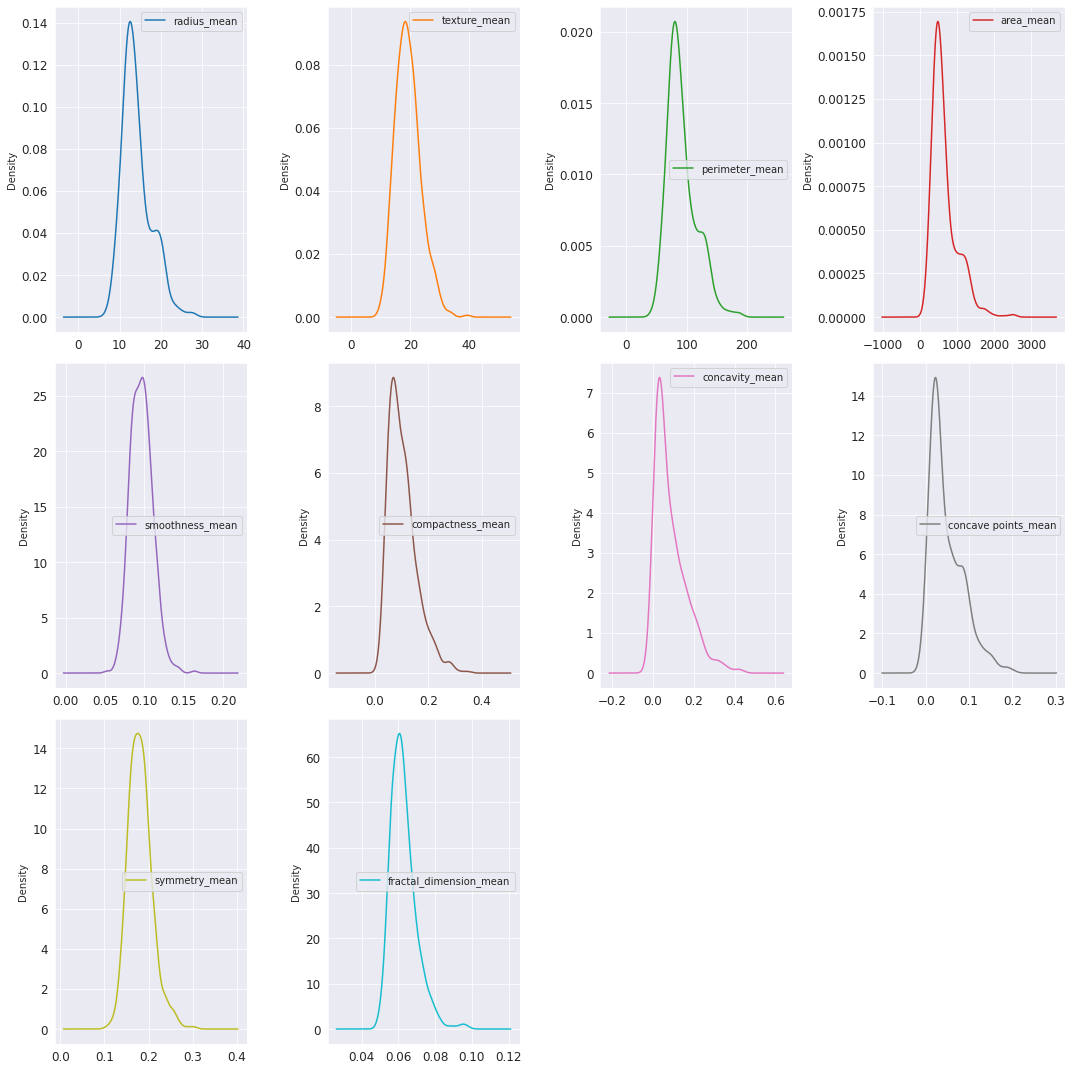

In [167]:
# Show kernel density plots

# mean
mean_kernel_plt = kernel_plt(mean_df)
plt.tight_layout()

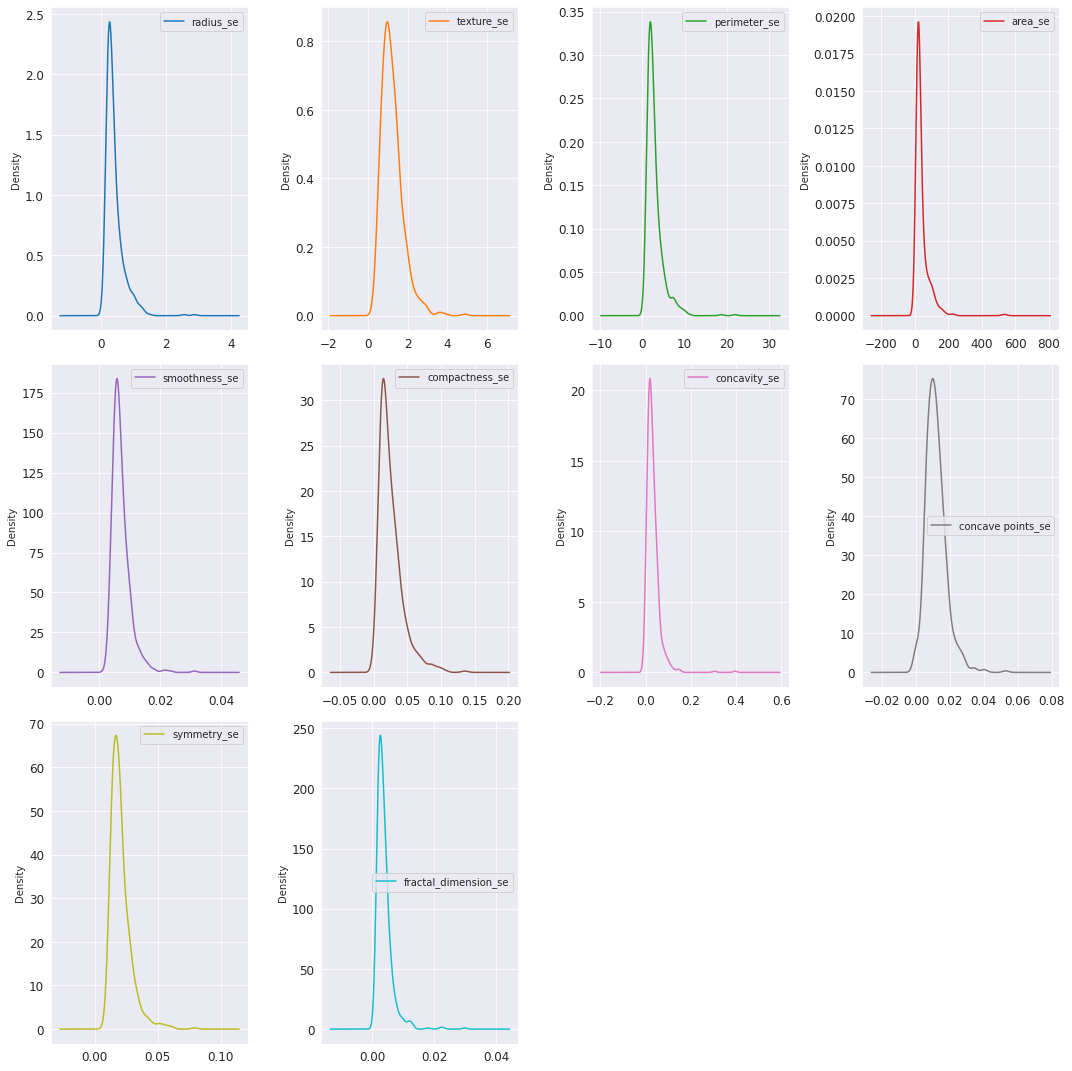

In [168]:
# se
se_kernel_plt = kernel_plt(se_df)
plt.tight_layout()

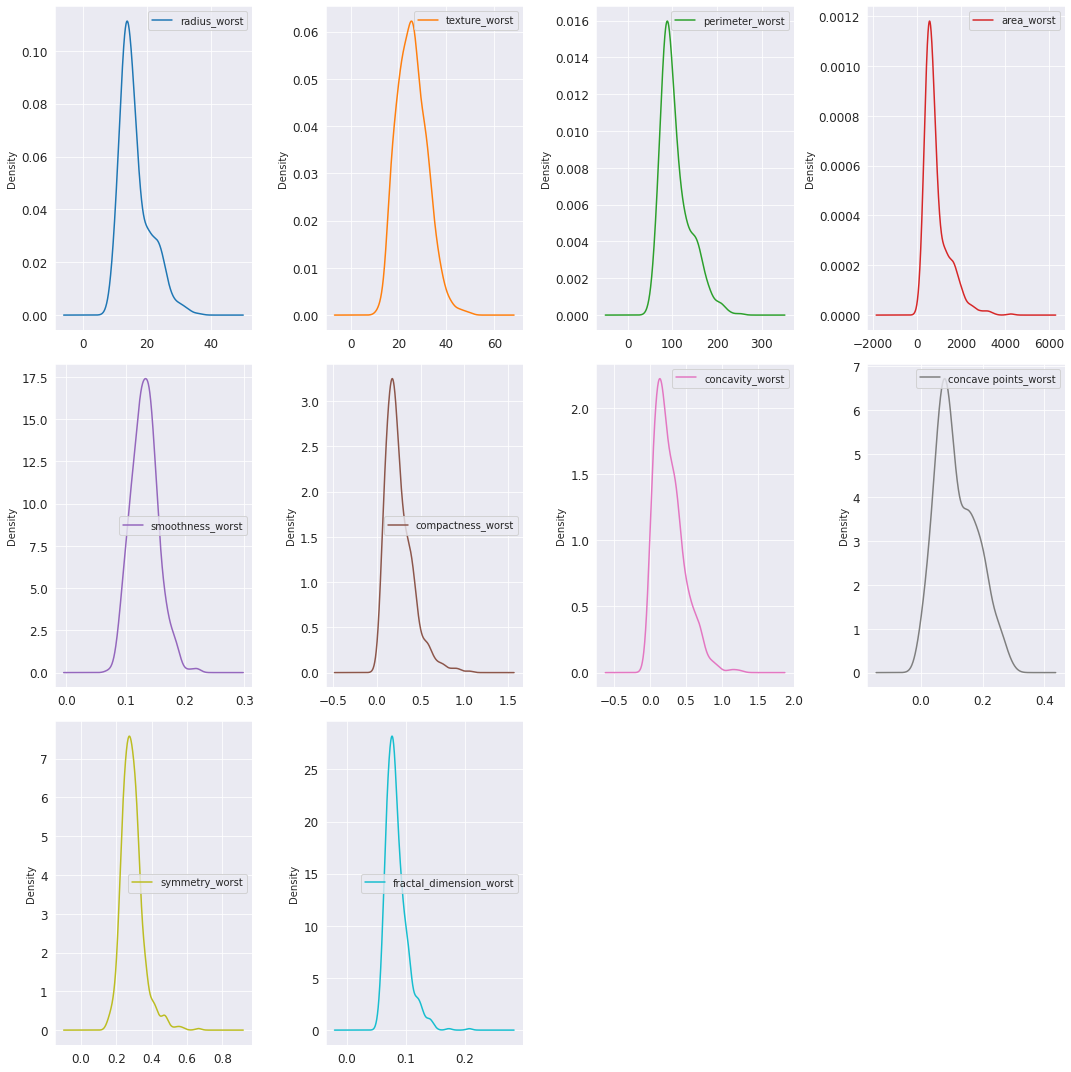

In [169]:
# worst
worst_kernel_plt = kernel_plt(worst_df)
plt.tight_layout()

**Multimodal Data Analysis**

In [176]:
# General correlation matrix function
def plt_cm(df):
  sns.set_style("white")

  # Get correlation matrix
  cm = df.corr()

  # Create triangular mask
  mask = np.zeros_like(cm, dtype = np.bool)
  mask[np.triu_indices_from(mask)] = True

  # Establish heatmap
  data, ax = plt.subplots(figsize=(10, 10))
  plt.title('Breast Cancer Feature Correlation Matrix')

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(cm, vmax=1.2, square='square', cmap='RdBu', mask=mask,
            ax=ax,annot=True, linewidths=1)

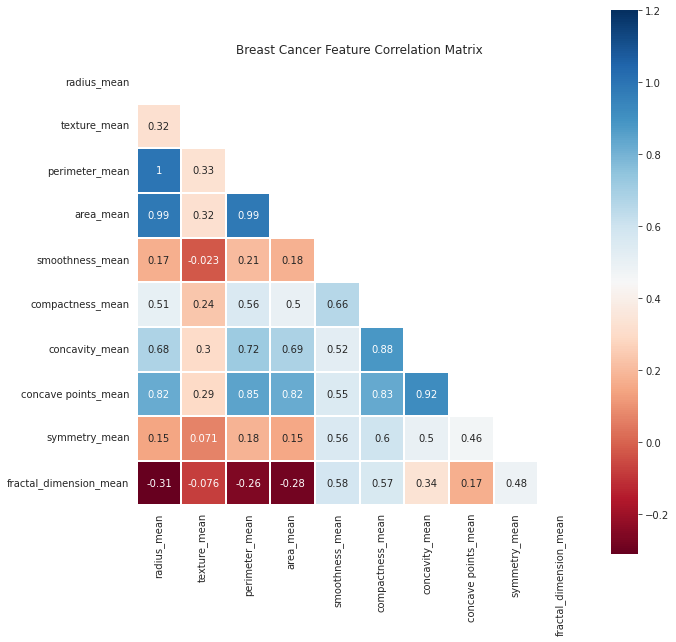

In [177]:
# mean

plt_cm(mean_df)

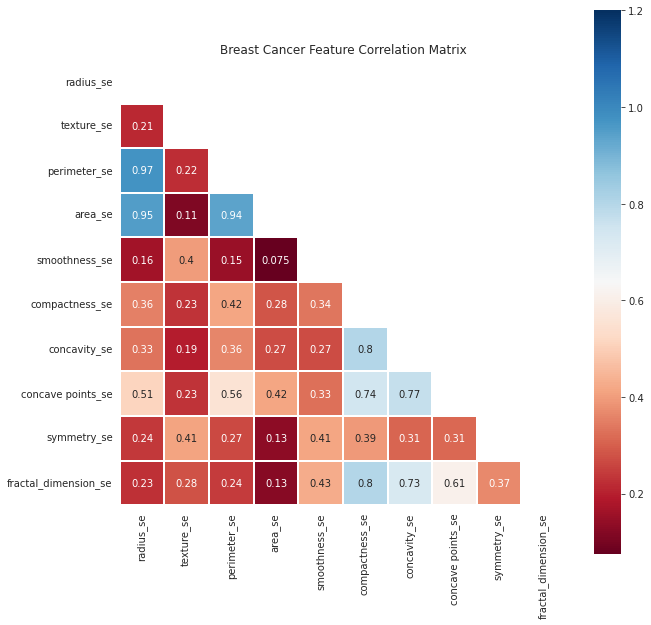

In [178]:
# se

plt_cm(se_df)

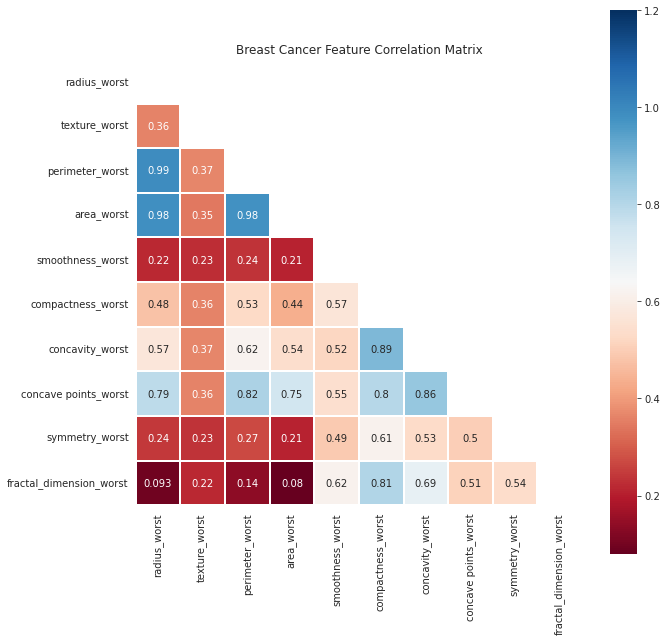

In [179]:
# worst

plt_cm(worst_df)

# Preprocessing

This section will
* Assign the categorical variable `diagnosis` with either 0 or 1 to indicate a sample as benign or malignant, respectively.
* Identify the best features in the dataset for prediction of `diagnosis`
* Normalize the data with a center of 0 to decrease variance.

In [180]:
# Drop features with lowest correlation according to heatmaps
df = df.drop(['smoothness_se', 'compactness_se'], axis = 1)

In [181]:
# Assign appropriate x and y variables
X = df.loc[:, 'radius_mean' : 'fractal_dimension_worst']
y = df['diagnosis']

# Map diagnosis with either 0 or 1 to indicate a sample as benign or 
# malignant, respectively.
diagnosis_map = {'B' : 0, 'M' : 1}
y = y.map(diagnosis_map)

# Now malignant samples are indicated by 1 and benign samples by 0.

In [182]:
# Check updated df
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [183]:
# Check target variable
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

**Set up Pipeline**

As defined by scikit-learn, pipelines
> Sequentially apply a list of transforms and a final estimator. Intermediate steps of pipeline must implement fit and transform methods and the final estimator only needs to implement fit.

In this case, the pipeline first consists of a standard scaler, then PCA, and finally a SVM.

In [184]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

**Standard Scaling**

To scale the data for all samples, the mean of the sample is removed through subtraction and then divided by the standard deviation. 

The formula is z = (x - u) / s, where z is the standard score, x is the sample,
u is the mean of all samples, and s is the standard deviation of all samples.


In [185]:
# Normalize data by centering around 0 and scaling to reduce variance.
scale = StandardScaler()
scale_X = scale.fit_transform(X)

**Perform linear dimensionality reduction using PCA (Principle Component Analysis)**

For this case, we reduce the data from a 3D to 2D subspace.

In [186]:
# Import PCA lib for dimensionalty reduction
from sklearn.decomposition import PCA

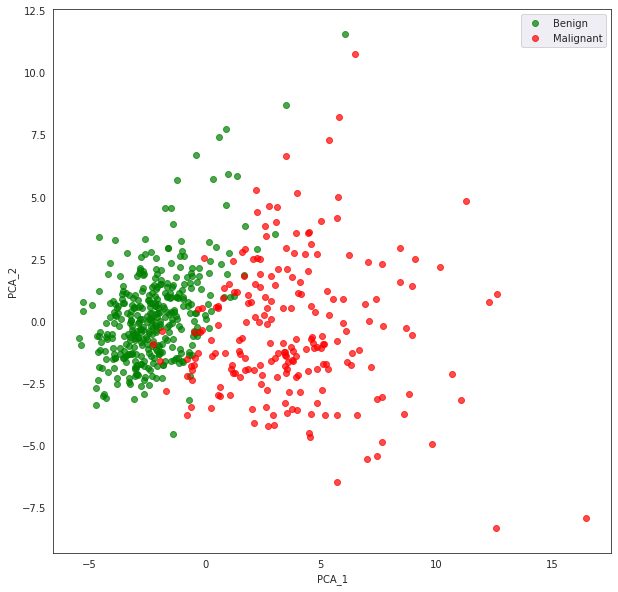

In [187]:
# Graph score plot

# n_components is set to amount of current features. Will be reduced later 
# according to scree plot.
pca = PCA(n_components = 28)
fit = pca.fit(scale_X)
pca_X = pca.transform(scale_X)

# Set axes according to data

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = pca_X[:, 0]
PCA_df['PCA_2'] = pca_X[:, 1]

plt.plot(PCA_df['PCA_1'][df.diagnosis == 'B'], PCA_df['PCA_2'][df.diagnosis == 'B'],'o', alpha = 0.7, color = 'g')
plt.plot(PCA_df['PCA_1'][df.diagnosis == 'M'], PCA_df['PCA_2'][df.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')

# Establish plot

sns.set_style("darkgrid")

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Benign','Malignant'])
plt.show()

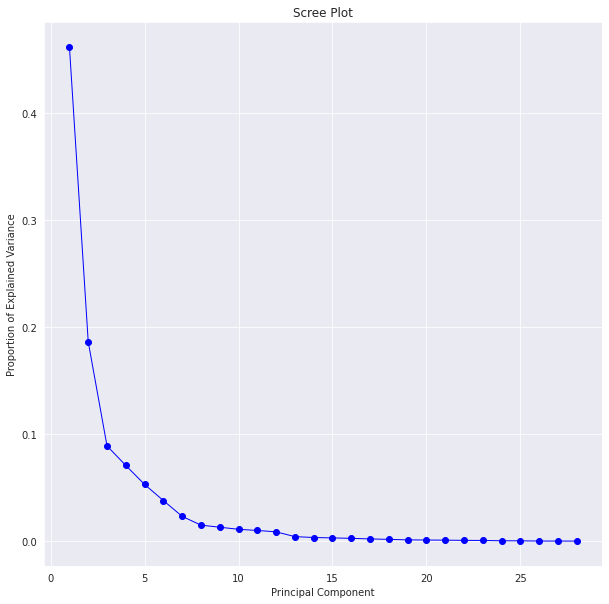

In [188]:
# Graph scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'bo-', linewidth = 1)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

plt.show()

Most change in slope occurs at component 3, so only the first 3 components will be retained.

In [189]:
# Feature extraction
pca = PCA(n_components = 3)
pca.fit(scale_X) 
X_pca = pca.transform(scale_X)

print("Explained Variance: " + str(fit.explained_variance_ratio_))

Explained Variance: [4.61438549e-01 1.86076038e-01 8.88752171e-02 7.06201359e-02
 5.29071862e-02 3.78573856e-02 2.30899258e-02 1.48994749e-02
 1.29636590e-02 1.10168921e-02 9.93374914e-03 8.64320163e-03
 4.17681592e-03 3.35646973e-03 2.95929873e-03 2.58200189e-03
 2.04181759e-03 1.60426347e-03 1.15313743e-03 9.90966824e-04
 8.88297643e-04 6.81917172e-04 6.06020413e-04 2.97724047e-04
 2.50360051e-04 5.79089864e-05 2.68070376e-05 4.77829405e-06]


In [190]:
# Split into training and testing datasets

from sklearn.model_selection import train_test_split

# Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 28), (426,), (143, 28), (143,))

In [191]:
# Pipeline Steps are StandardScaler, PCA and SVM 
steps = [('scaler', StandardScaler()), ('pca', PCA()), ('SVM', SVC(kernel = 'rbf'))]

SVM_params= { 
    'pca__n_components' : [3],
    'SVM__C': [0.1, 0.5, 1, 10, 30, 40, 50, 75, 100, 500, 1000], 
    'SVM__gamma' : [0.01, 0.05, 0.07, 0.1, 0.5, 1, 5, 10, 50]
}

pipeline = Pipeline(steps)

In [192]:
# Assess accuracy of 4 and 5 folds
for cv in range(4,6):
  print('Testing ' + str(cv) + ' folds:')
  grid = GridSearchCV(pipeline, param_grid = SVM_params, cv = cv)
  grid.fit(X_train, y_train)
  print("Score = %3.2f" %(grid.score(X_test,y_test)))
  print(grid.best_params_)

Testing 4 folds:
Score = 0.92
{'SVM__C': 0.5, 'SVM__gamma': 0.01, 'pca__n_components': 3}
Testing 5 folds:
Score = 0.95
{'SVM__C': 40, 'SVM__gamma': 0.1, 'pca__n_components': 3}


In [193]:
# Find best parameters for classifiction
print ('Best grid params: ', grid.best_params_) 

Best grid params:  {'SVM__C': 40, 'SVM__gamma': 0.1, 'pca__n_components': 3}


              precision    recall  f1-score   support

           0       0.93      1.00      0.97        98
           1       1.00      0.84      0.92        45

    accuracy                           0.95       143
   macro avg       0.97      0.92      0.94       143
weighted avg       0.95      0.95      0.95       143



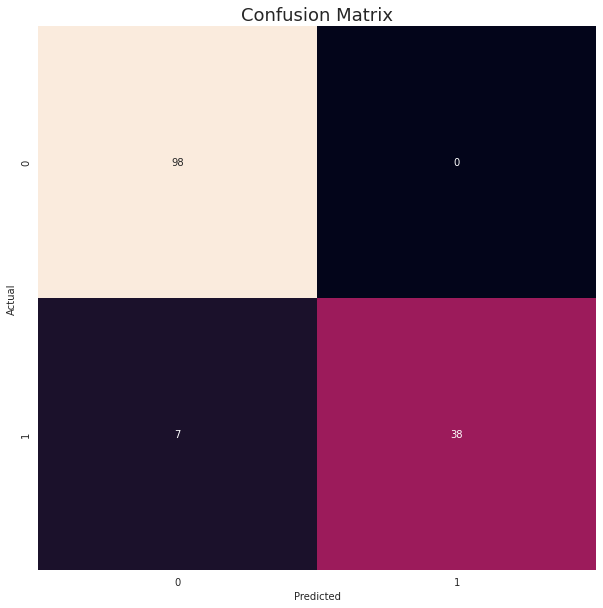

In [194]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = grid.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, range(2), range(2))

sns.heatmap(df_cm, annot = True, cbar = False)
plt.title("Confusion Matrix", fontsize = 18)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("Confusion Matrix.png", dpi = 200)

print(classification_report(y_test, y_pred))

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

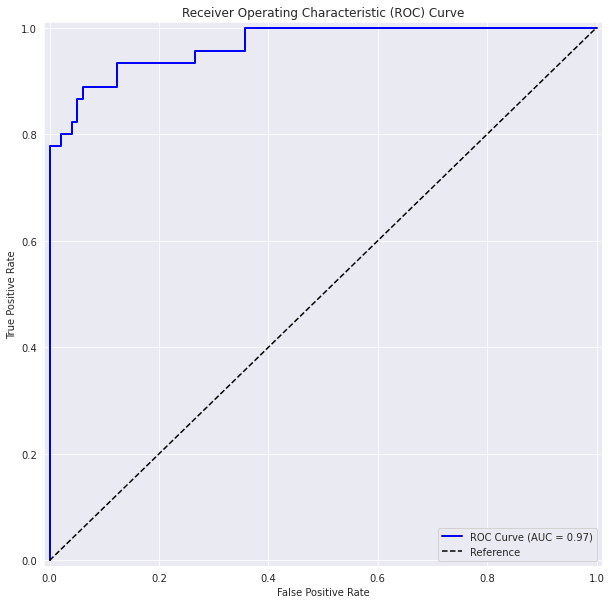

In [206]:
# Evaluate binary classification with ROC curve
from sklearn.metrics import roc_curve, auc

# Set plot
plt.figure(figsize = (10, 10))
sns.set_style('darkgrid')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])

# Graph plot
clf = SVC(probability = True)
clf.fit(X_train, y_train)

probabilities = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw = 2, color = 'blue', label = 'ROC Curve (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color = 'black', label = 'Reference')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('Receiver Operating Characteristic (ROC) Curve')

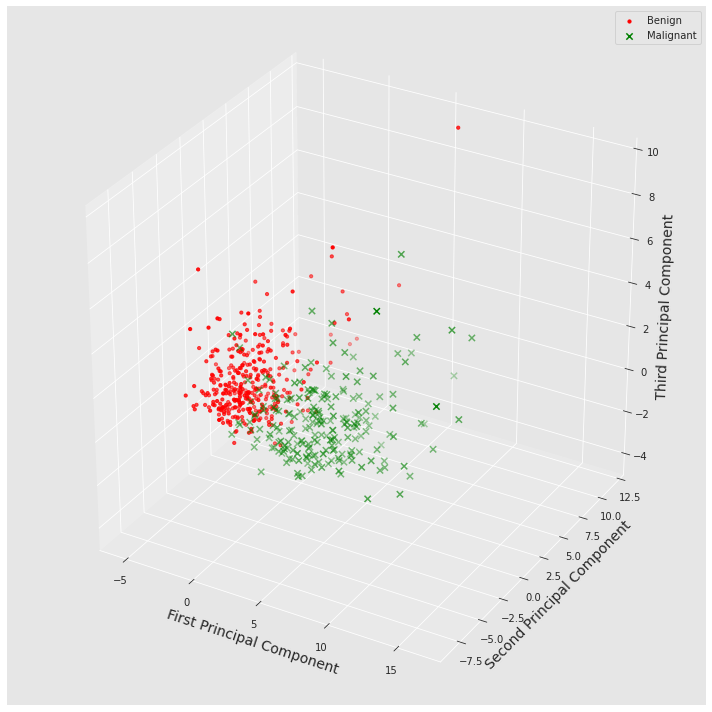

In [202]:
# Graph 3D plot from PCA components
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection = '3d')

label = {0 : 'Benign', 1 : 'Malignant'}
marker = {0 : '.', 1 : 'x'}

X_dim = X_pca[:, 0]
Y_dim = X_pca[:, 1]
Z_dim = X_pca[:, 2]

for u_y in np.unique(y):
  index_y = np.where(y == u_y)
  ax.scatter(X_dim[index_y], Y_dim[index_y], Z_dim[index_y], 
             cmap = 'tab10', s = 40, marker = marker[u_y],
           label=label[u_y])
  
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.tight_layout()